# Lending Club Case Study

### Problem Statement

consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1.If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2.If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

In [1]:
## importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
## seaborn leads to so many warnings to ignore those warnings importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the dataset and check the first five rows
loans_information = pd.read_csv("loan.csv")
loans_information.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Checking the shape of the dataframe
loans_information.shape

(39717, 111)

### Data Handling and cleaning

#### There are so many columns with all null values So removing the columns which have all null values 

In [4]:
#dropping the columns using dropna
loans_information.dropna(axis = 1, how = 'all', inplace = True)
loans_information.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [5]:
#Checking the shape of the dataframe
loans_information.shape

(39717, 57)

####  Some of the columns in the dataset is having single value and these single valued columns will not  contribute anything to  our analysis so removing these columns


In [6]:
## Following are the single values columns :'pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'
loans_information.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loans_information.head()



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [7]:
#Checking the shape of the dataframe
loans_information.shape

(39717, 48)

### Now we have 48 columns out of which some of them are related to the customer behaviour variables which are correspond to the post approval of loan
-  We are analyzing the driving factors of loan which can lead to defaulting before approving loan.


##### customer behaviour variables list:
- delinq_2yrs
- revol_bal
- out_prncp
- total_pymnt
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- next_pymnt_d
- chargeoff_within_12_mths
- mths_since_last_delinq
- mths_since_last_record

In [8]:
loans_information.drop(["delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)
loans_information.shape

(39717, 33)

### Now we have 33 columns out of which some of them are not required for our analysis that means those columns will not contribute to the loan defaulting analysis so removing those columns  

- List of such columns are :
    - "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv "

    - "funded_amnt" is not needed. We need only how much amount is funded by investors so dropping this column .

In [9]:
loans_information.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state", "desc", "out_prncp_inv", "total_pymnt_inv", "funded_amnt"], axis = 1, inplace = True)
loans_information.shape

(39717, 21)

In [10]:
loans_information.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

In [11]:
## Checking for null values in the columns 
loans_information.isnull().sum()

loan_amnt                 0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               50
total_acc                 0
dtype: int64

In [12]:
# "emp_length" and "revol_util" have null values
# Checking "emp_length" and "revol_util" what kind of data they are
loans_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt_inv      39717 non-null  float64
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  issue_d              39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  earliest_cr_line     39717 non-null 

In [13]:
# 'emp_length' is an object. Finnding the mode value for 'emp_length'
loans_information['emp_length'].mode()[0]

'10+ years'

In [14]:
#adding the mode value to the missing values in 'emp_length'
loans_information['emp_length'] = loans_information['emp_length'].fillna(loans_information['emp_length'].mode()[0])
loans_information.emp_length.value_counts()

10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [15]:
#Check the nulls in the 'emp_length' column again to cross-verify
loans_information['emp_length'].isnull().sum()

0

In [16]:
#dropping the rows which contains null values for "revol_util" 
loans_information.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loans_information.revol_util.isnull().sum()

0

#### Standardizing the data 

In [17]:
#Checking data types
loans_information.dtypes

loan_amnt                int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
dti                    float64
earliest_cr_line        object
inq_last_6mths           int64
open_acc                 int64
pub_rec                  int64
revol_util              object
total_acc                int64
dtype: object

In [18]:
#"int_rate" column is having continuous values but column is defined as an object because it contains the  % symbol So removing the % symbol from int_rate and converting to numeric
loans_information.int_rate = pd.to_numeric(loans_information.int_rate.apply(lambda x : x.split('%')[0]))
loans_information.int_rate.dtypes

dtype('float64')

In [19]:
# "revol_util" column is having continuous values but column is defined as an object because it contains the  % symbol So removing the % symbol from revol_util and converting the column to numeric
loans_information.revol_util = pd.to_numeric(loans_information.revol_util.apply(lambda x : x.split('%')[0]))
loans_information.revol_util.dtypes

dtype('float64')

In [20]:
loans_information.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
4,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.9,38


In [21]:
#  "emp_length" have < symbol and + symbol so considering < 1 as 0 and 10+ as 10 
loans_information.emp_length = pd.to_numeric(loans_information.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))
loans_information.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
4,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,80000.0,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.9,38


In [22]:
### The goal of the analysis is to see who is likely to default we cannot consider the current loan status so dropping records  with current loan status.
loans_information = loans_information[loans_information.loan_status != "Current"]
loans_information.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### Checking for Outlier to the columns which contains numerical variables
- loan_amnt
- funded_amnt_inv
- annual_inc
- dti


<AxesSubplot:xlabel='loan_amnt'>

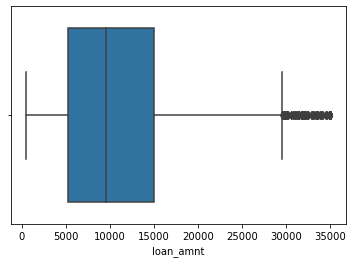

In [23]:
sns.boxplot(loans_information.loan_amnt)

<AxesSubplot:xlabel='funded_amnt_inv'>

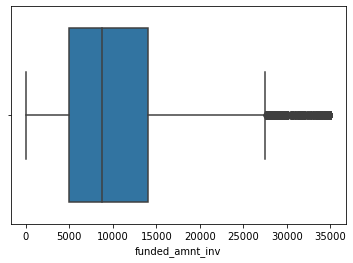

In [24]:
sns.boxplot(loans_information.funded_amnt_inv)

<AxesSubplot:xlabel='annual_inc'>

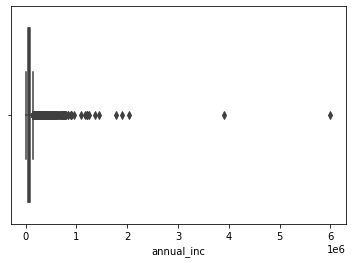

In [25]:
sns.boxplot(loans_information.annual_inc)

#### From the Box plot we can  Clearly indentify the Presence of outliers so removing those Outliers.

- Extracting the quantile_information to check from  where exactly values are disconected 

In [26]:
#Extracting the quantile_information to check from  where exactly values are disconected 
quantile_information = loans_information.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_information

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [27]:
# The values after 95 percentile seems to be disconected so considering threshold for removing outliers as 0.95
loans_information = loans_information[loans_information.annual_inc <= loans_information['annual_inc'].quantile(0.95)]


<AxesSubplot:xlabel='annual_inc'>

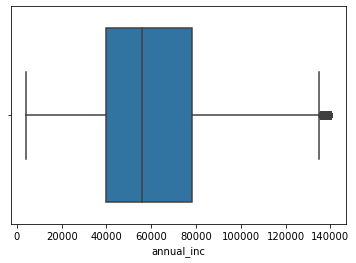

In [28]:
sns.boxplot(loans_information.annual_inc)

<AxesSubplot:xlabel='dti'>

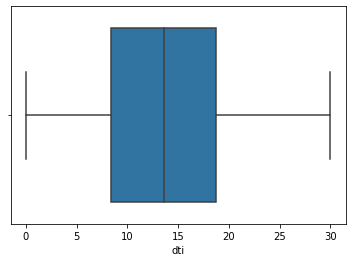

In [29]:
sns.boxplot(loans_information.dti)

#### Deriving new variables from existing variables and modifying existing variables
- Deriving 'loan_to_ai' column 
- Deriving 'issue_year' column from the existing 'issue_d' column

In [30]:
# Loan to annual income variable
loans_information['loan_to_ai'] = round(loans_information['loan_amnt']/loans_information['annual_inc'],2)
loans_information['issue_year'] = loans_information['issue_d'].apply(lambda x : datetime.datetime.strptime(x, '%b-%y').year)
loans_information = loans_information.reset_index(drop=True)
#loans['issue_year']
round(100*(loans_information.isnull().sum()/len(loans_information.index)), 2)
loans_information.shape

(36606, 23)

In [31]:
loans_information.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,loan_to_ai,issue_year
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,credit_card,27.65,Jan-85,1,3,0,83.7,9,0.21,2011
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,car,1.00,Apr-99,5,3,0,9.4,4,0.08,2011
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,small_business,8.72,Nov-01,2,2,0,98.5,10,0.20,2011
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,other,20.00,Feb-96,1,10,0,21.0,37,0.20,2011
4,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,wedding,11.20,Nov-04,3,9,0,28.3,12,0.14,2011


## Visualizing Data 
### Univariate  Analysis

- We are analyzing and visualizing only the defaulter data. So subsetting the data while plotting only for 'Charged Off' loan_status for below plots

In [32]:
# Plotting average overall default rate

sns.set(style="darkgrid")
#ax = sns.countplot(x="loan_status", data=loans)
def create_plots(x_var,data_df,x_label,title,hue_var=None,rot_flag=0,fig_size_x=15,fig_size_y=6):
    ncount = len(loans_information)
    dims = (fig_size_x,fig_size_y)
    plt.figure(figsize=dims)
    ax = sns.countplot(x=x_var, data=data_df,hue=hue_var,palette="Set3")
    plt.title(title)
    plt.xlabel(x_label)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    if(rot_flag==1):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)
    



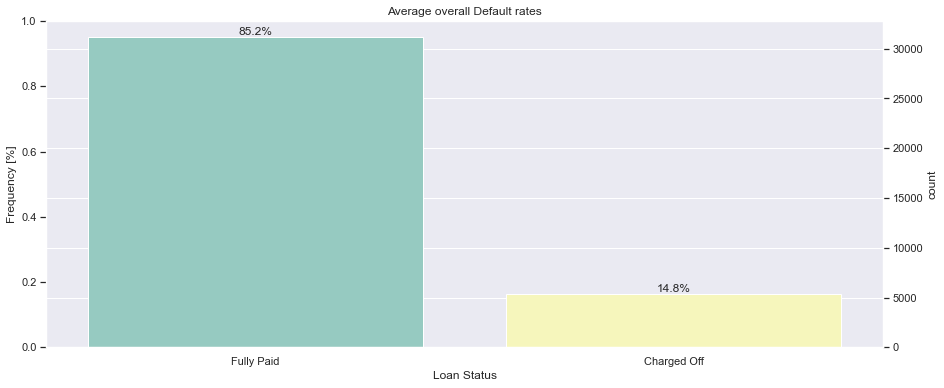

In [33]:
create_plots("loan_status",loans_information,'Loan Status','Average overall Default rates')

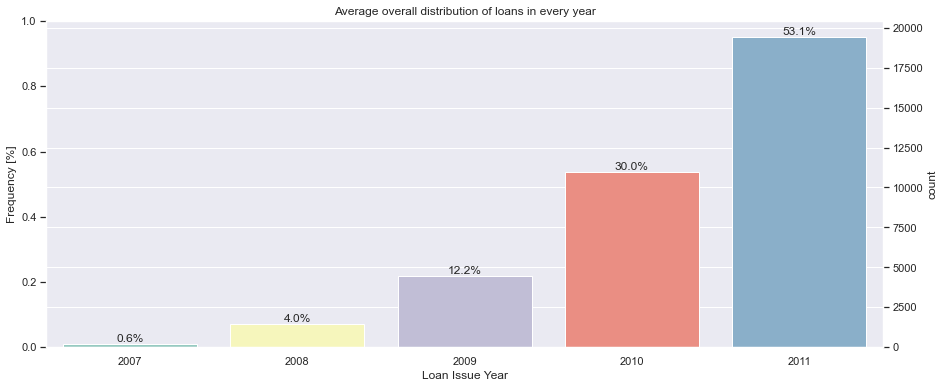

In [34]:
create_plots("issue_year",loans_information,'Loan Issue Year','Average overall distribution of loans in every year')



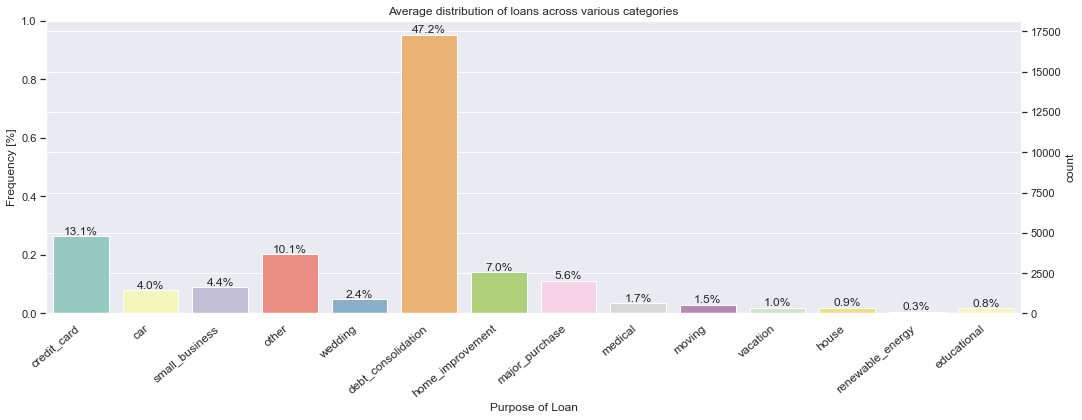

In [35]:
create_plots("purpose",loans_information,'Purpose of Loan','Average distribution of loans across various categories',None,1)


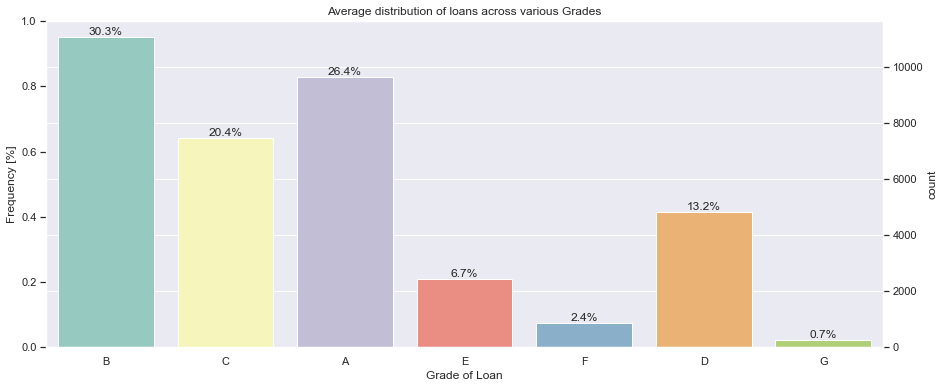

In [36]:
create_plots("grade",loans_information,'Grade of Loan','Average distribution of loans across various Grades')

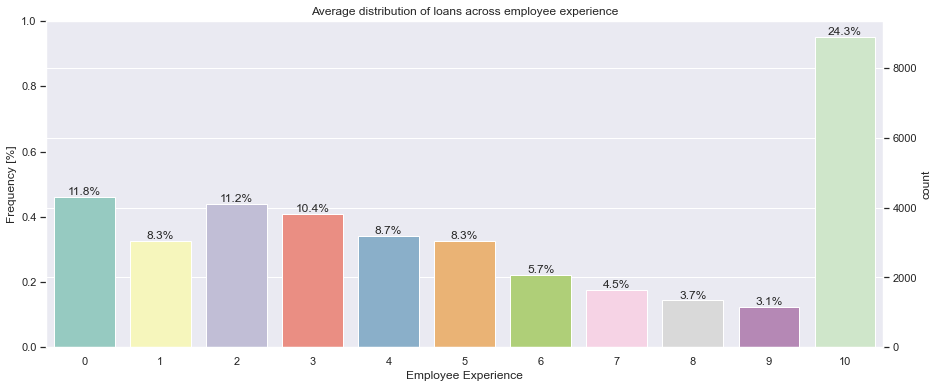

In [37]:
create_plots("emp_length",loans_information,'Employee Experience','Average distribution of loans across employee experience')

### Insights from above plots
- From above plots we can see that average default rate across all categories is 14.8%
- The number of loan applicants is increasing every year
- People with 10 years of experience are taking loans more frequently.
- More people in grades A, B , C are taken loan then compared other grades
- The following are the top 6 categories where maximum loan applications have been received so we can see high defaulting probability in these categories.
    -debt_consolidation
    -credit_card
    -other
    -home_improvement
    -major_purchase
    -small_business

### Now we will filter the data for these categories and also we will derive new variables for our analysis
- We will derive below variables for our analysis
- Dti Range variable - Higher the dti ratio, lessen the chances of loan getting accepted.
- Dti<10(low), dti>10 and dt<20 (medium) else ‘high’
- Loan to annual income variable range - Higher the ratio , more chances of defaulting.
- loan_to_ai <0.10(low), >0.10 and <0.20 (medium) , >0.20 (high)
- Experience category : <3 years (junior) , between 3 - 7 years (senior) , >7 years (specialist)

In [38]:
def dti_range(dti):
    if dti <= 10.00:
        return 'low'
    elif (dti >10.00 and dti <= 20.00):
        return 'medium'
    else:
        return 'high'
        
def loan_to_ai_range(loan_to_ai):
    if loan_to_ai <= 0.10:
        return 'low'
    elif (loan_to_ai >0.10 and loan_to_ai <= 0.20):
        return 'medium'
    else:
        return 'high'

def experience_level(exp):
    if exp <= 3:
        return 'Junior'
    elif (exp >3 and exp <= 7):
        return 'Senior'
    else:
        return 'Specialist'
    
category_list = ['debt_consolidation','credit_card','other','home_improvement','major_purchase','small_business']
loans_information = loans_information.query('purpose == @category_list')
loans_information['dti_range'] = loans_information['dti'].apply(lambda x : dti_range(x) )
loans_information['loan_to_ai_range'] = loans_information['loan_to_ai'].apply(lambda x : loan_to_ai_range(x) )
loans_information['exp_level'] = loans_information['emp_length'].apply(lambda x : experience_level(int(x)))

loans_information.shape

(31975, 26)

### Univariate segmented Analysis on new derived variables and on filtered data

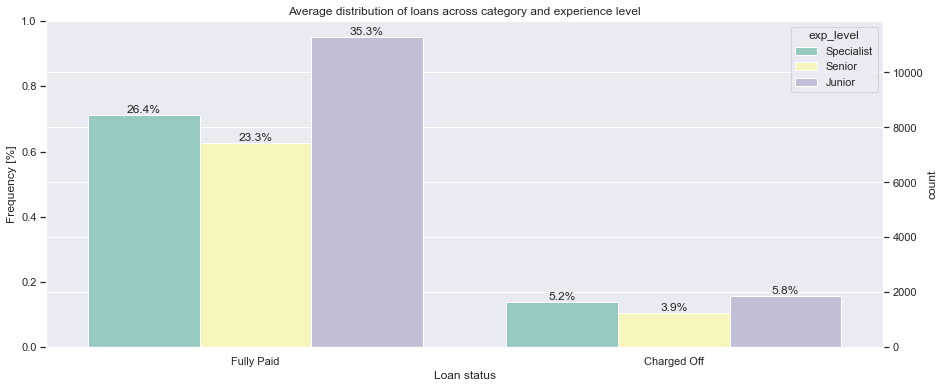

In [39]:
create_plots("loan_status",loans_information,'Loan status','Average distribution of loans across category and experience level','exp_level')


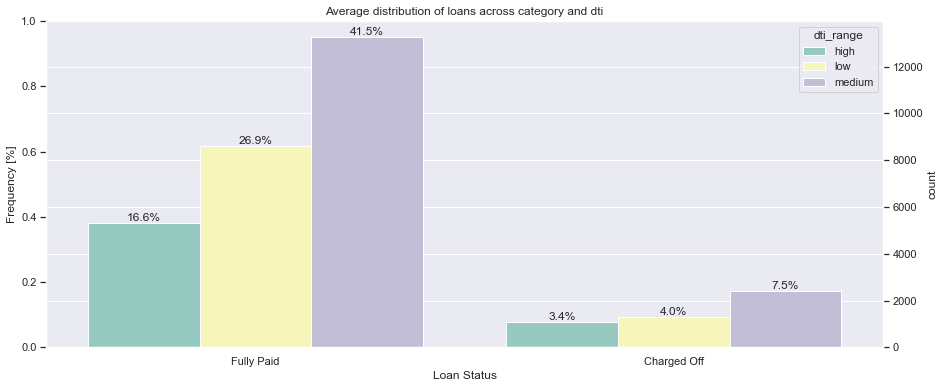

In [40]:
create_plots("loan_status",loans_information,'Loan Status','Average distribution of loans across category and dti','dti_range')


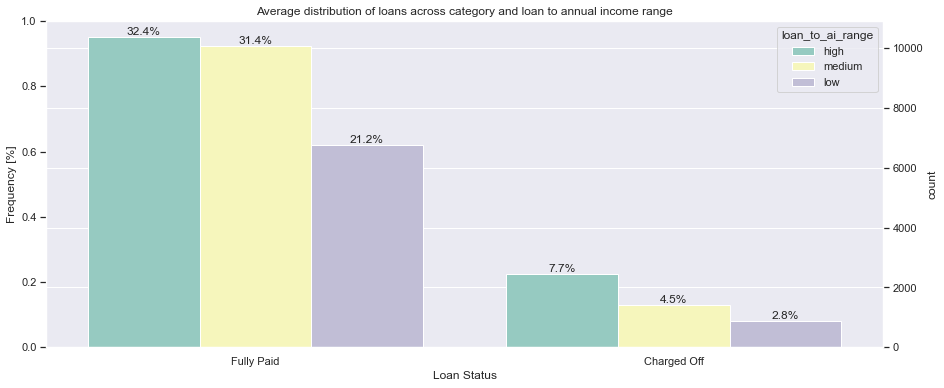

In [41]:
create_plots("loan_status",loans_information,'Loan Status','Average distribution of loans across category and loan to annual income range','loan_to_ai_range')


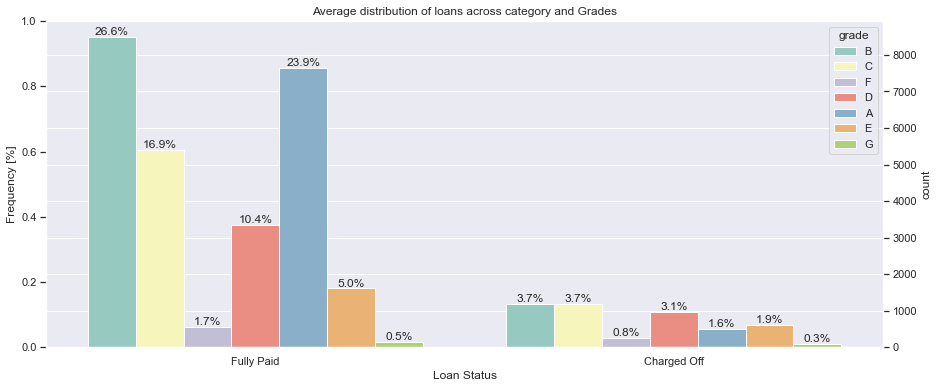

In [42]:
create_plots("loan_status",loans_information,'Loan Status','Average distribution of loans across category and Grades','grade')

### Insights from above plots
- People with the <3 years of experience have high chance of default.
- People lying in medium dti range have high chances of default
- People who have high loan to annual income ratio are at high risk of defaulting.
- Grades B,C and D are at high probablity of defaulting.


### Bivariate Analysis
- Considering the house ownership and verified source of income  how these are affecting the analysis 


In [43]:
#  In the First Verification Status column  we can check the value counts 
loans_information['verification_status'].value_counts()


Not Verified       14028
Verified           10142
Source Verified     7805
Name: verification_status, dtype: int64

In [44]:
#Considering Source Verified  and Verified are simillar changing the Source Verified as Verified .Now we have two values one is Not verofied and Source Verified 
loans_information['verification_status']= loans_information['verification_status'].apply(lambda x :'Verified' if (x=='Verified' or x == 'Source Verified')  else 'Not Verified')
loans_information['verification_status'].value_counts()


Verified        17947
Not Verified    14028
Name: verification_status, dtype: int64

<AxesSubplot:title={'center':'Distribution of Not Verified Source Income on Grades'}, xlabel='Loan Status', ylabel='Frequency [%]'>

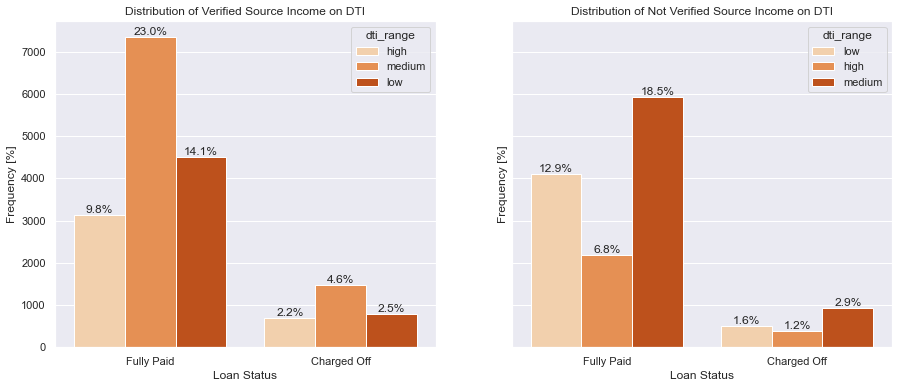

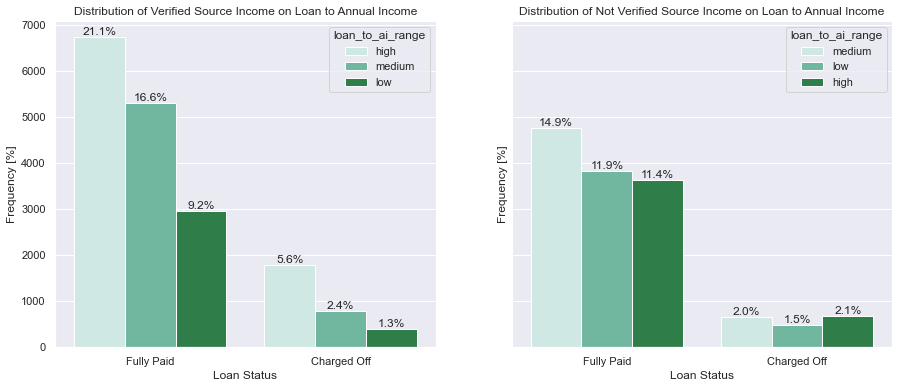

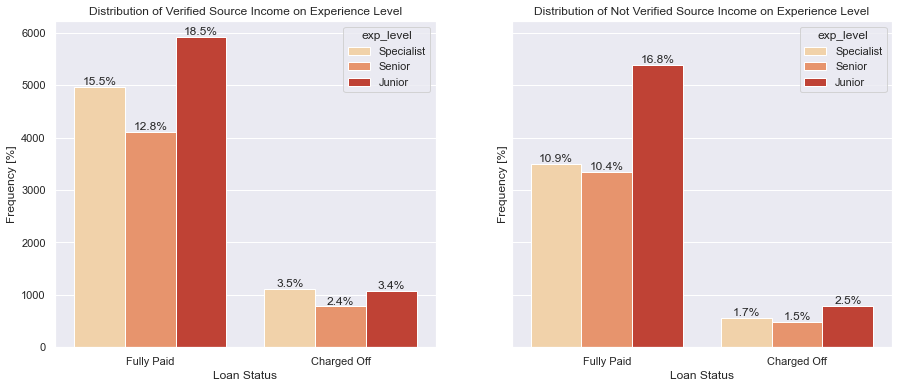

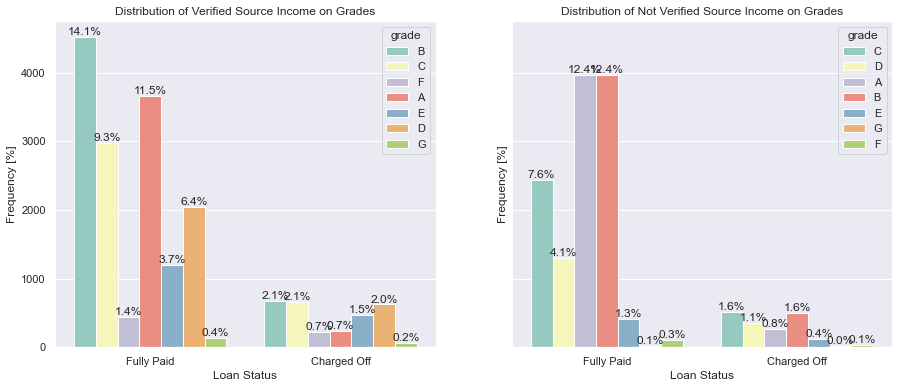

In [45]:
# creating subplots to vizualize the Bivariate Analysis
def Draw_subplot(x_var,df_data,xlabel,title,hue_var=None,palette='Dark2',rot_flag=0,axis=None):
    
    if axis is None:
        axis= plt.gca()  
    bp = sns.countplot(x=x_var, data=df_data,hue=hue_var,palette=palette,ax=axis)
    if(rot_flag==1):
        axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    axis.set_title(title)
    axis.set_xlabel(xlabel)
    axis.set_ylabel('Frequency [%]')
    for p in axis.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        axis.annotate('{:.1f}%'.format(100.*y/len(loans_information)), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    return bp

# make figure with subplots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
Draw_subplot('loan_status',loans_information[loans_information['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on DTI','dti_range','Oranges',0, ax1)
Draw_subplot('loan_status',loans_information[loans_information['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on DTI','dti_range','Oranges',0, ax2)   

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
Draw_subplot('loan_status',loans_information[loans_information['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on Loan to Annual Income','loan_to_ai_range','BuGn',0, ax1)
Draw_subplot('loan_status',loans_information[loans_information['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on Loan to Annual Income','loan_to_ai_range','BuGn',0, ax2)   

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
Draw_subplot('loan_status',loans_information[loans_information['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on Experience Level','exp_level','OrRd',0, ax1)
Draw_subplot('loan_status',loans_information[loans_information['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on Experience Level','exp_level','OrRd',0, ax2)   

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
Draw_subplot('loan_status',loans_information[loans_information['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on Grades','grade','Set3',0, ax1)
Draw_subplot('loan_status',loans_information[loans_information['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on Grades','grade','Set3',0,ax2)

#### Insights from above plots
-  people having medium dti range will have the  higher chances of default  for both verified and not  verified verification status
- people who are verified and have high annual income range are having higher chances of default
- But for the people who are not verified and who have high and medium annual income they have higher chances of default
- Specialist and Juniors are high chances of default in the verified source income 
- Grades B and C are having higher chances of default

####  How house ownership is affecting the loan status

<AxesSubplot:title={'center':'Distribution of Owned Asset on Grades'}, xlabel='Loan Status', ylabel='Frequency [%]'>

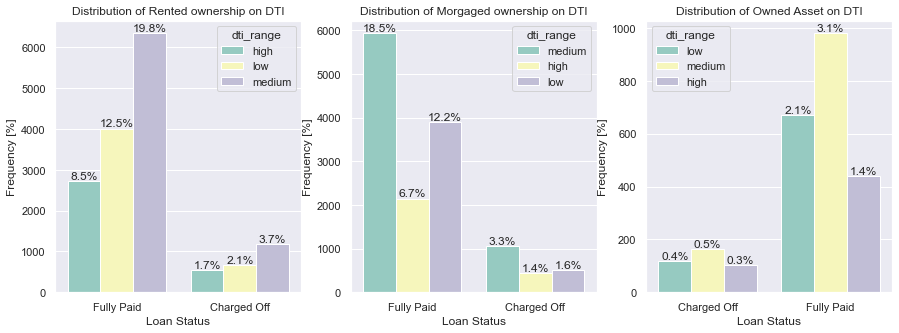

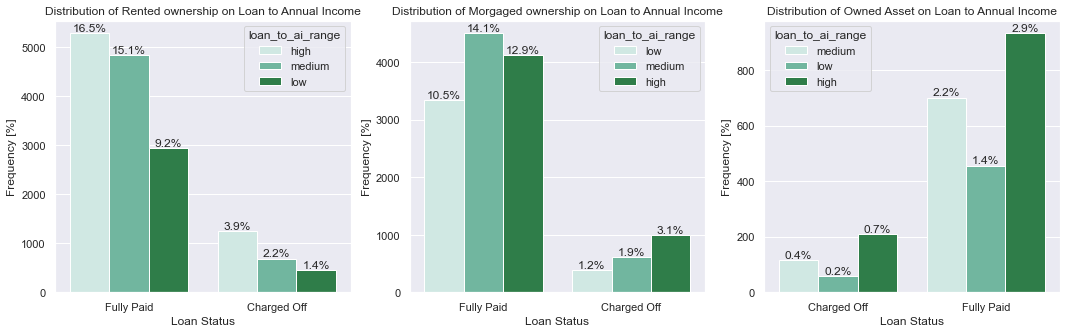

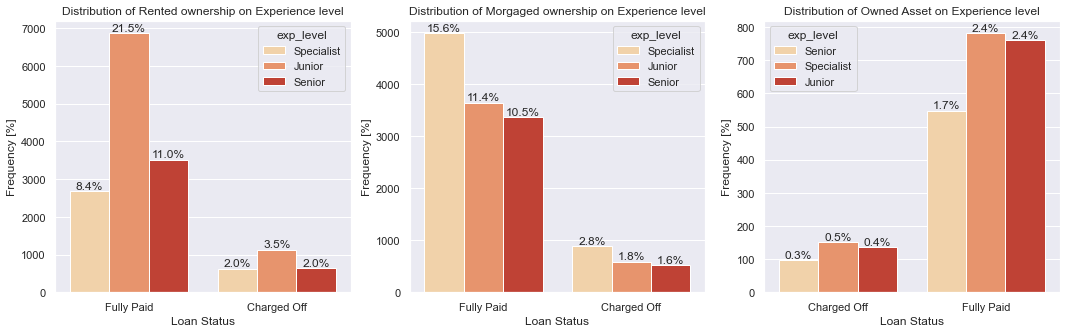

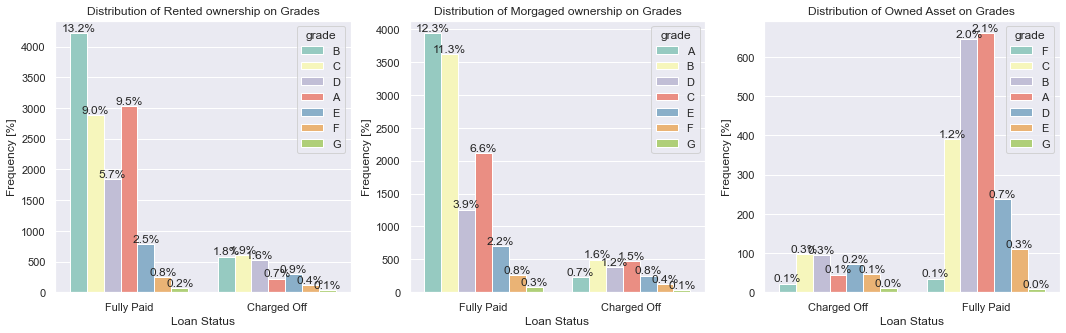

In [46]:
fig, axs = plt.subplots(ncols=3,figsize=(15,5))
Draw_subplot('loan_status',loans_information[loans_information['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on DTI','dti_range','Set3',0, axs[0])
Draw_subplot('loan_status',loans_information[loans_information['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on DTI','dti_range','Set3',0, axs[1])   
Draw_subplot('loan_status',loans_information[loans_information['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on DTI','dti_range','Set3',0, axs[2])   


fig, axs = plt.subplots(ncols=3,figsize=(18,5))
Draw_subplot('loan_status',loans_information[loans_information['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on Loan to Annual Income','loan_to_ai_range','BuGn',0, axs[0])
Draw_subplot('loan_status',loans_information[loans_information['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on Loan to Annual Income','loan_to_ai_range','BuGn',0, axs[1])   
Draw_subplot('loan_status',loans_information[loans_information['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on Loan to Annual Income','loan_to_ai_range','BuGn',0, axs[2])   

fig, axs = plt.subplots(ncols=3,figsize=(18,5))
Draw_subplot('loan_status',loans_information[loans_information['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on Experience level','exp_level','OrRd',0, axs[0])
Draw_subplot('loan_status',loans_information[loans_information['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on Experience level','exp_level','OrRd',0, axs[1])   
Draw_subplot('loan_status',loans_information[loans_information['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on Experience level','exp_level','OrRd',0, axs[2])   

fig, axs = plt.subplots(ncols=3,figsize=(18,5))
Draw_subplot('loan_status',loans_information[loans_information['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on Grades','grade','Set3',0, axs[0])
Draw_subplot('loan_status',loans_information[loans_information['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on Grades','grade','Set3',0, axs[1])   
Draw_subplot('loan_status',loans_information[loans_information['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on Grades','grade','Set3',0, axs[2])   

#### Insights from above plots
- People who have medium dti income having higher chances of default for all three kinds of home ownership 
- People who have High annual income having higher chances of default for all three kinds of home ownership 
- People who are having rented home and with experience between >3 and < 7 years are having higher chances of default
- People who are having mortgaged and owned asset with grater than 7 years of experience  are having high chances of default
- People who have B and C grades having higher chances of default for all three kinds of home ownership 


In [47]:
# Filtering all the numerical values to see the correlation 
laons_corr_df = loans_information.filter(["loan_amnt", "funded_amnt", "funded_amnt_inv",'int_rate_float','installment','emp_length','annual_inc','dti','loan_to_ai']) 
correlation_of_nv = laons_corr_df.corr()
round(correlation_of_nv, 3)

,loan_amnt,funded_amnt_inv,installment,emp_length,annual_inc,dti,loan_to_ai
loan_amnt,1.000,0.935,0.928,0.136,0.409,0.087,0.671
funded_amnt_inv,0.935,1.000,0.900,0.149,0.386,0.094,0.623
installment,0.928,0.900,1.000,0.107,0.405,0.075,0.607
emp_length,0.136,0.149,0.107,1.000,0.159,0.049,0.019
annual_inc,0.409,0.386,0.405,0.159,1.000,-0.087,-0.288
dti,0.087,0.094,0.075,0.049,-0.087,1.000,0.135
loan_to_ai,0.671,0.623,0.607,0.019,-0.288,0.135,1.000


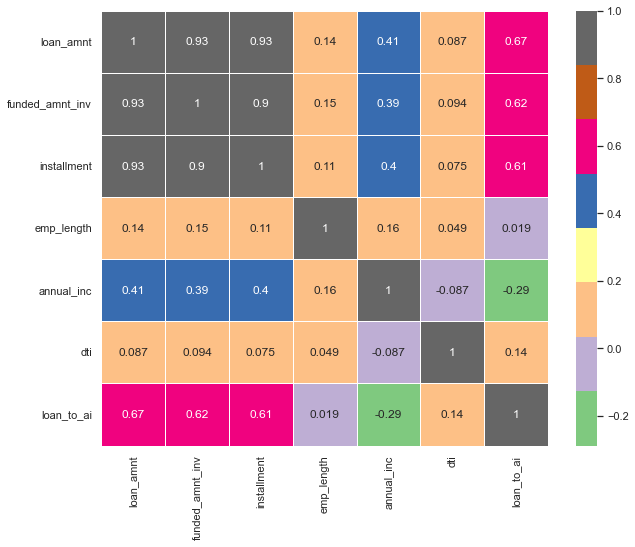

In [48]:
#Plotting Heat map to understand correlation of correlation_of_nv of numerical values--- "correlation_of_nv"
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(correlation_of_nv, annot=True, linewidths=.6, cmap="Accent")
plt.show()